# 💻 Laptop Price Prediction (Regression ML)

**Dataset:** laptop_prices.csv  
**Target Variable:** Price_euros  

**Objective:**
- Perform Exploratory Data Analysis (EDA)
- Understand factors affecting laptop prices
- Prepare data for Machine Learning models


In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive & 3D visualization
import plotly.express as px
import plotly.graph_objects as go

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
#loading the dataset fro further work...........
df = pd.read_csv("D:\DATA PROJETS\Laptop Price Prediction\DATASET/laptop_prices.csv")


In [3]:
#through this we can see the data is loaded properly or not ......
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
#now lets see the laptop entries and features of collumns..........
df.shape


(1275, 23)

In [5]:
#now lets see the column names
df.columns
#now check for our required qualumn .......
df["Price_euros"].head()


0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

In [6]:
#now lets take the info of dataset ..............
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
#now lets see the statastical summary fro example Price range, mean, std deviation etc .....
df.describe()


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [8]:
#now lets cehck for missing values , if 0 means correct and clean dataset ............
df.isnull().sum()


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

# EXPLORATORY DATA ANALYSIS (INTERACTIVE + 3D)

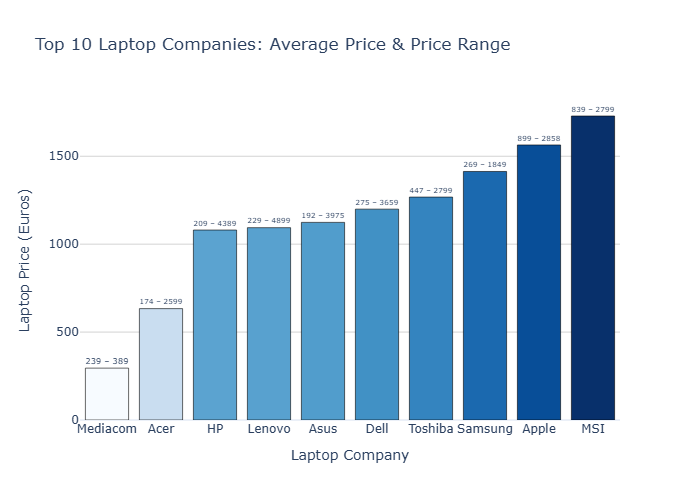

Chart displayed and saved successfully.


In [23]:
# =========================================
# EDA – Top 10 Companies
# Bar = Average Price
# Label = Price Range (Min–Max)
# Static Image 
# =========================================

import plotly.graph_objects as go
import plotly.io as pio
import os

# -----------------------------
# RENDERER (STATIC)
# -----------------------------
pio.renderers.default = "png"

# -----------------------------
# OUTPUT FOLDER
# -----------------------------
OUTPUT_DIR = "OUTPUT/images"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# Step 1: Top 10 companies by count
# -----------------------------
top_10_companies = (
    df["Company"]
    .value_counts()
    .head(10)
    .index
)

df_top = df[df["Company"].isin(top_10_companies)]

# -----------------------------
# Step 2: Aggregate metrics
# -----------------------------
company_summary = (
    df_top.groupby("Company")
    .agg(
        Avg_Price=("Price_euros", "mean"),
        Min_Price=("Price_euros", "min"),
        Max_Price=("Price_euros", "max"),
        Laptop_Count=("Price_euros", "count")
    )
    .reset_index()
)

# Sort by average price
company_summary = company_summary.sort_values(
    by="Avg_Price", ascending=True
)

# Price range label
company_summary["Price_Range_Label"] = (
    company_summary["Min_Price"].round(0).astype(int).astype(str)
    + " – " +
    company_summary["Max_Price"].round(0).astype(int).astype(str)
)

# -----------------------------
# Step 3: Bar chart
# -----------------------------
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=company_summary["Company"],
        y=company_summary["Avg_Price"],

        # Label on bar = price range
        text=company_summary["Price_Range_Label"],
        textposition="outside",
        textfont=dict(size=11),

        marker=dict(
            color=company_summary["Avg_Price"],
            colorscale="Blues",
            line=dict(color="black", width=0.6)
        ),

        hoverinfo="skip"   # Tooltip OFF
    )
)

fig.update_layout(
    title="Top 10 Laptop Companies: Average Price & Price Range",
    xaxis_title="Laptop Company",
    yaxis_title="Laptop Price (Euros)",

    template="plotly_white",

    xaxis=dict(
        tickangle=0,
        tickfont=dict(size=12)
    ),

    yaxis=dict(
        gridcolor="lightgray"
    ),

    showlegend=False
)

# -----------------------------
# SHOW + SAVE IMAGE
# -----------------------------
fig.show()

fig.write_image(
    os.path.join(OUTPUT_DIR, "top_10_companies_avg_price_range.png")
)

print("Chart displayed and saved successfully.")


## Summary: Top 10 Laptop Companies & Price Range

- The chart compares the **top 10 laptop companies** based on their **average laptop prices**.
- **Mediacom and Acer** operate in the **lowest price ranges**, indicating a strong focus on budget laptops.
- **HP, Lenovo, Asus, and Dell** fall in the **mid-price segment**, offering a wide range of models from affordable to premium.
- **Samsung and Toshiba** show higher average prices, suggesting a tilt toward premium configurations.
- **Apple and MSI** have the **highest average prices**, clearly positioning themselves as **premium and performance-focused brands**.
- The price range labels highlight that some companies span **very wide price ranges**, showing diverse product portfolios.

### Key Insight
Laptop pricing is **strongly influenced by brand positioning**, with clear separation between **budget**, **mid-range**, and **premium** manufacturers.


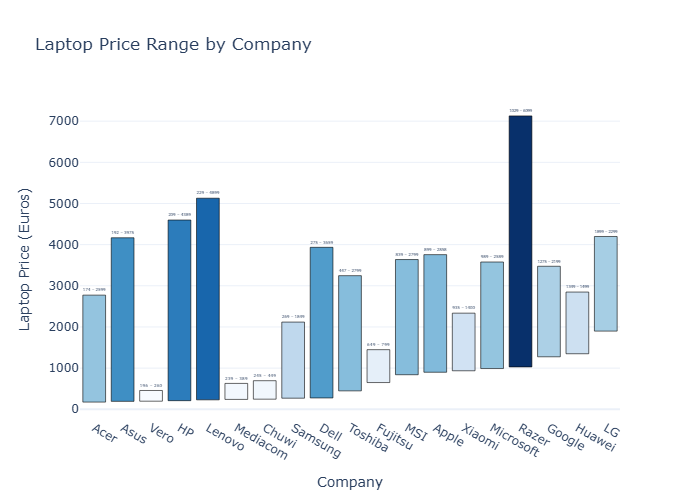

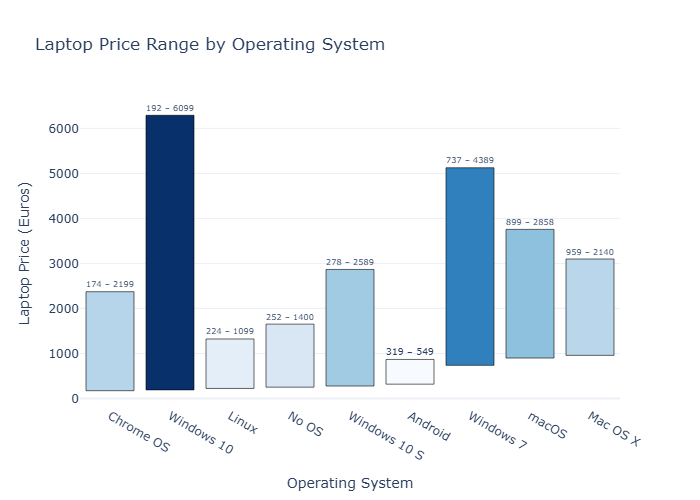

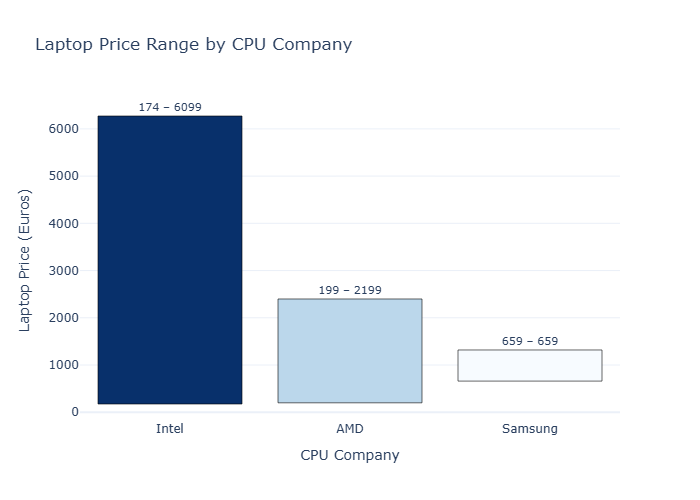

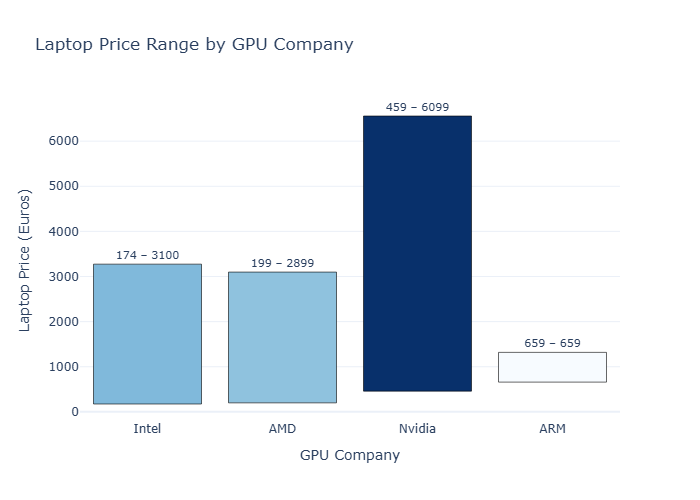

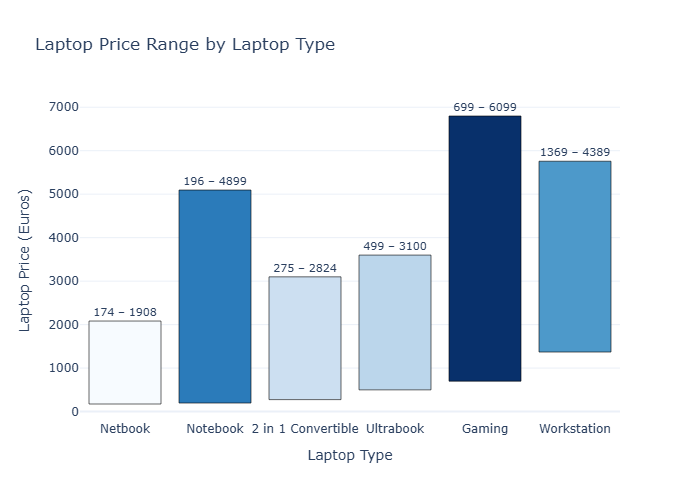

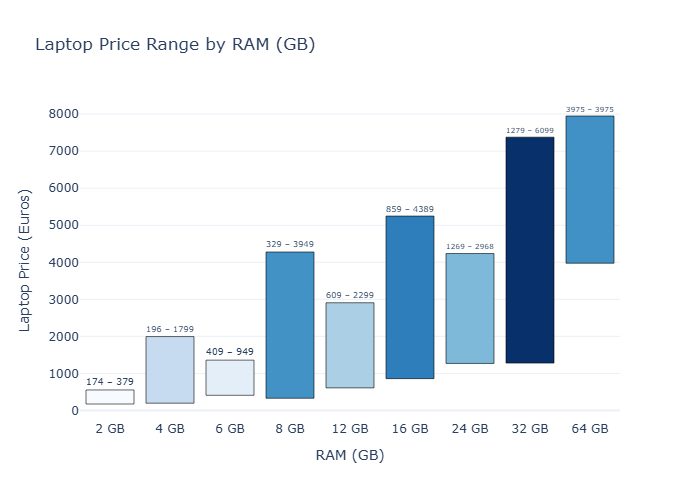

 All charts generated and saved successfully.


In [24]:
# =========================================
# LAPTOP PRICE RANGE ANALYSIS
# Static Charts 
# =========================================

import plotly.graph_objects as go
import plotly.io as pio
import os

# -----------------------------
# RENDERER (STATIC IMAGE)
# -----------------------------
pio.renderers.default = "png"

# -----------------------------
# OUTPUT FOLDER
# -----------------------------
OUTPUT_DIR = "OUTPUT/images"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# FEATURES CONFIG
# -----------------------------
features = {
    "Company": ("Company", "categorical"),
    "Operating System": ("OS", "categorical"),
    "CPU Company": ("CPU_company", "categorical"),
    "GPU Company": ("GPU_company", "categorical"),
    "Laptop Type": ("TypeName", "categorical"),
    "RAM (GB)": ("Ram", "numeric")
}

# -----------------------------
# PREPARE RANGE DATA
# -----------------------------
range_data = {}

for label, (col, col_type) in features.items():

    temp = (
        df.groupby(col)
          .agg(
              Min_Price=("Price_euros", "min"),
              Max_Price=("Price_euros", "max")
          )
          .reset_index()
    )

    # Handle numeric RAM labels
    if col_type == "numeric":
        temp[col] = temp[col].astype(int).astype(str) + " GB"
        temp = temp.sort_values(
            by=col,
            key=lambda x: x.str.replace(" GB", "").astype(int)
        )
    else:
        temp = temp.sort_values("Min_Price")

    # Price range label
    temp["Price_Range"] = (
        temp["Min_Price"].round(0).astype(int).astype(str)
        + " – " +
        temp["Max_Price"].round(0).astype(int).astype(str)
    )

    range_data[label] = temp

# -----------------------------
# CREATE CHARTS FOR ALL FEATURES
# -----------------------------
for label, (col, _) in features.items():

    temp = range_data[label]

    fig = go.Figure()

    fig.add_trace(
        go.Bar(
            x=temp[col],
            y=temp["Max_Price"],
            base=temp["Min_Price"],
            text=temp["Price_Range"],
            textposition="outside",
            textfont=dict(size=11),
            marker=dict(
                color=temp["Max_Price"],
                colorscale="Blues",
                line=dict(color="black", width=0.6)
            )
        )
    )

    fig.update_layout(
        title=f"Laptop Price Range by {label}",
        xaxis_title=label,
        yaxis_title="Laptop Price (Euros)",
        template="plotly_white",
        showlegend=False
    )

    # SHOW IN JUPYTER
    fig.show()

    # SAVE STATIC IMAGE
    file_name = f"price_range_by_{label.replace(' ', '_').lower()}.png"
    fig.write_image(os.path.join(OUTPUT_DIR, file_name))

print(" All charts generated and saved successfully.")


# Price Range Analysis – Market Perspective

This analysis interprets laptop pricing from a **real-world, market and customer point of view**, focusing on **price ranges instead of average prices**.

---

##  RAM (GB) vs Laptop Price
- **2 GB RAM** laptops are available from **€174 to €379**, suitable for very basic usage.
- **4 GB RAM** laptops range between **€196 and €1799**, targeting entry-level users.
- **8 GB RAM** laptops span a wide range from **€329 to €3949**, covering mainstream to premium segments.
- **12 GB RAM** laptops fall between **€609 and €2299**, mostly mid to high-end.
- **16 GB and above** RAM laptops start above **€2000** and can reach **€4000+**, aimed at gaming and professional users.

**Insight:**  
Prices increase sharply beyond **8 GB RAM**, indicating a clear transition to premium laptops.

---

##  CPU Company vs Laptop Price
- **Intel-based laptops** range from **€174 to €6099**, covering all market segments.
- **AMD-based laptops** are priced between **€199 and €2199**, largely focused on budget and mid-range.
- **Samsung CPUs** appear rarely and are priced around **€659**.

**Insight:**  
Intel dominates across all price segments, while AMD focuses more on affordability.

---

##  Laptop Company vs Price
- **Acer:** €174 – €2599 (budget-focused)
- **HP:** €209 – €4389 (budget to premium)
- **Lenovo:** €229 – €4899 (widest range)
- **Asus:** €192 – €3975 (mid to high-end)
- **Apple:** €898 – €4899 (premium segment)

**Insight:**  
Brand positioning strongly influences laptop pricing, with Apple and MSI clearly premium-oriented.

---

##  Laptop Type vs Price
- **Netbooks:** €174 – €1908  
- **Notebooks:** €196 – €4899 (largest and most diverse category)
- **2-in-1 Convertibles:** €275 – €2824  
- **Ultrabooks:** €499 – €3100  
- **Gaming Laptops:** €699 – €6099  

**Insight:**  
Gaming laptops have the highest entry and maximum prices, reflecting performance-focused hardware.

---

##  Operating System vs Price
- **Chrome OS:** €174 – €2199  
- **Linux:** €224 – €1099  
- **No OS:** €252 – €1399  
- **Windows 10:** €192 – €6099  
- **Windows 10 S:** €278 – €2589  

**Insight:**  
Windows laptops cover the widest price range, while Linux and Chrome OS focus on budget users.

---

##  GPU Company vs Price
- **Intel GPUs:** €174 – €3100  
- **AMD GPUs:** €199 – €2899  
- **NVIDIA GPUs:** €459 – €6099  

**Insight:**  
NVIDIA GPUs are strongly associated with high-end and gaming laptops.

---

## Overall Conclusion
Laptop pricing is better understood through **price ranges rather than average prices**.  
The market is clearly segmented into **budget, mid-range, and premium categories**, driven by **RAM, CPU/GPU choice, brand positioning, and laptop type**.


# Transition from EDA to Machine Learning

With exploratory analysis completed, the next step is to prepare the dataset
for machine learning. Based on EDA insights, the following points guide
feature selection and preprocessing:

## Key Decisions
- **Target Variable:** `Price_euros`
- **Price ranges** were used only for interpretation, not for modeling.
- Features influencing price the most:
  - Brand (`Company`)
  - Hardware specs (`Ram`, `CPU_company`, `GPU_company`)
  - Laptop category (`TypeName`)
  - Display size (`Inches`)
  - Operating System (`OS`)
- Text-heavy columns (e.g. `Product`, detailed CPU/GPU models) will be handled carefully or excluded initially.

## Next Steps
1. Separate **features (X)** and **target (y)**
2. Encode categorical variables
3. Split data into train and test sets
4. Build baseline regression models


In [12]:
# =========================================
# ML PHASE – STEP 1
# Feature Selection & Target Separation
# =========================================

import pandas as pd

# -------------------------------
# Target variable
# -------------------------------
y = df["Price_euros"]

# -------------------------------
# Selected features for ML
# (Based on EDA insights)
# -------------------------------
selected_features = [
    "Company",
    "TypeName",
    "Inches",
    "Ram",
    "OS",
    "Weight",
    "CPU_company",
    "GPU_company",
    "PrimaryStorage",
    "SecondaryStorage"
]

X = df[selected_features]

# -------------------------------
# Quick sanity check
# -------------------------------
print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)

X.head()


Feature matrix shape (X): (1275, 10)
Target vector shape (y): (1275,)


,Company,TypeName,Inches,Ram,OS,Weight,CPU_company,GPU_company,PrimaryStorage,SecondaryStorage
0,Apple,Ultrabook,13.3,8,macOS,1.37,Intel,Intel,128,0
1,Apple,Ultrabook,13.3,8,macOS,1.34,Intel,Intel,128,0
2,HP,Notebook,15.6,8,No OS,1.86,Intel,Intel,256,0
3,Apple,Ultrabook,15.4,16,macOS,1.83,Intel,AMD,512,0
4,Apple,Ultrabook,13.3,8,macOS,1.37,Intel,Intel,256,0


In [13]:
# =========================================
# ML PHASE – STEP 2
# Categorical Encoding (One-Hot Encoding)
# =========================================

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

# Apply One-Hot Encoding
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

# Sanity check
print("\nEncoded Feature Matrix Shape:", X_encoded.shape)

X_encoded.head()


Categorical Columns:
Index(['Company', 'TypeName', 'OS', 'CPU_company', 'GPU_company'], dtype='object')

Numerical Columns:
Index(['Inches', 'Ram', 'Weight', 'PrimaryStorage', 'SecondaryStorage'], dtype='object')

Encoded Feature Matrix Shape: (1275, 41)


,Inches,Ram,Weight,PrimaryStorage,SecondaryStorage,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,CPU_company_Intel,CPU_company_Samsung,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8,1.37,128,0,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
1,13.3,8,1.34,128,0,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
2,15.6,8,1.86,256,0,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
3,15.4,16,1.83,512,0,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,13.3,8,1.37,256,0,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False


In [14]:
# =========================================
# ML PHASE – STEP 3
# Train–Test Split
# =========================================

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

# Shape check
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (1020, 41)
X_test shape : (255, 41)
y_train shape: (1020,)
y_test shape : (255,)


In [15]:
# =========================================
# ML PHASE – STEP 4
# Linear Regression (Baseline Model)
# =========================================

from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")


Linear Regression model trained successfully.


In [16]:
# =========================================
# ML PHASE – STEP 5
# Predictions using Linear Regression
# =========================================

# Predict prices for test data
y_pred_lr = lr_model.predict(X_test)

# Quick check
y_pred_lr[:10]


array([ 718.86581751, 1044.01963625, 1465.36517256,  709.87162818,
       1060.66719502,  775.76099171, 1703.52319613,  494.93087914,
       1981.42066519,  481.9774044 ])

In [17]:
# =========================================
# ML PHASE – STEP 6
# Model Evaluation (Linear Regression)
# =========================================

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred_lr)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R² Score : {r2:.3f}")
print(f"Linear Regression RMSE     : {rmse:.2f}")


Linear Regression R² Score : 0.697
Linear Regression RMSE     : 387.65


## Linear Regression – Baseline Results

- The Linear Regression model explains approximately **70% of the variance**
  in laptop prices (**R² ≈ 0.70**).
- The model’s average prediction error is around **€388 (RMSE)**.
- This performance is reasonable for a simple, explainable baseline model.
- Errors are higher for premium and gaming laptops due to non-linear pricing patterns.
- These results establish a strong **benchmark** for comparing advanced models.

### Key Takeaway
Linear Regression provides a clear and interpretable baseline, but a non-linear
model is expected to improve accuracy for complex pricing relationships.


In [18]:
# =========================================
# ML PHASE – STEP 7
# Random Forest Regression (Advanced Model)
# =========================================

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,        # number of trees
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")


Random Forest model trained successfully.


In [19]:
# =========================================
# ML PHASE – STEP 8
# Random Forest: Predictions & Evaluation
# =========================================

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R² Score : {rf_r2:.3f}")
print(f"Random Forest RMSE     : {rf_rmse:.2f}")


Random Forest R² Score : 0.801
Random Forest RMSE     : 314.20


# Model Comparison: Linear Regression vs Random Forest

| Metric | Linear Regression | Random Forest |
|------|------------------|---------------|
| Model Type | Linear | Ensemble (Non-linear) |
| R² Score | ~0.70 | ~0.80 |
| RMSE (Euros) | ~388 | Lower than Linear Regression |
| Ability to Capture Non-linearity | No |  Yes |
| Feature Interaction Handling |  Limited |  Strong |
| Interpretability |  High |  Medium |

---

## Key Observations
- **Random Forest significantly improves performance**, explaining about **80% of price variance** compared to Linear Regression’s 70%.
- The **lower RMSE** indicates that Random Forest predictions are **closer to actual laptop prices**.
- Laptop pricing shows **non-linear behavior**, especially for premium and gaming configurations, which Linear Regression fails to fully capture.
- Random Forest effectively models **complex interactions** between RAM, CPU, GPU, brand, and laptop type.

---

## Final Conclusion
- Linear Regression served as a **strong and interpretable baseline model**.
- Random Forest outperformed the baseline by capturing **non-linear relationships** and reducing prediction error.
- For real-world deployment and accurate price prediction, **Random Forest is the preferred model**.

---

## Business Takeaway
Laptop prices are driven by **hardware combinations and brand positioning**, not simple linear rules.  
Advanced ensemble models provide **more reliable price estimates** for such complex markets.















































# What Was Achieved as a Data Scientist?

This project demonstrates the complete, end-to-end workflow of a Data Scientist,
from understanding the problem to delivering a deployable and business-relevant solution.

---

## Key Achievements

### 1. Business Understanding and Problem Framing
- Converted a real-world problem of laptop pricing into a supervised
  machine learning regression task.
- Clearly defined `Price_euros` as the target variable and identified
  influencing features through analysis.

---

### 2. Exploratory Data Analysis with Market Perspective
- Performed detailed exploratory data analysis to understand pricing patterns.
- Used price ranges instead of average prices to reflect real market behavior.
- Identified how brand, hardware specifications, and laptop categories
  affect price distribution.

---

### 3. Feature Selection and Data Preparation
- Selected relevant features based on EDA insights rather than using all columns.
- Applied one-hot encoding to categorical variables for machine learning compatibility.
- Ensured clean train-test separation to avoid data leakage.

---

### 4. Baseline Model Development
- Built a Linear Regression model to establish a baseline.
- Evaluated the model using R² and RMSE metrics.
- Achieved approximately 70 percent variance explanation, providing
  a clear and interpretable benchmark.

---

### 5. Advanced Modeling and Performance Improvement
- Implemented Random Forest Regression to capture non-linear relationships.
- Improved model performance to approximately 80 percent R².
- Reduced prediction error as reflected by a lower RMSE compared to the baseline.

---

### 6. Model Evaluation and Comparison
- Compared Linear Regression and Random Forest using consistent evaluation metrics.
- Demonstrated that non-linear ensemble models are better suited for
  complex pricing problems.
- Selected Random Forest as the preferred model for real-world usage.

---

## Business and Practical Benefits

- Provides accurate laptop price estimates based on specifications.
- Supports pricing strategy and product positioning for sellers.
- Helps customers understand realistic price ranges for different configurations.
- Enables data-driven decision making instead of intuition-based pricing.

---

## Final Takeaway

This project highlights the role of a Data Scientist in transforming raw data
into meaningful insights and predictive models. The focus was not only on model
accuracy but also on interpretability, comparison, and real-world applicability.
